Reading dataset to achieve K-means from cluster analysis

In [3]:
import pandas as pd

# Load the dataset
imdb_data = pd.read_csv('./data/imdb_dataset.csv')

# Displaying the first few rows of the dataset for an overview
imdb_data.head()


,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


Implementing the Elbow method by plotting SSE against possible cluster counts

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# Selecting relevant features for clustering
# Assuming 'genre', 'runtime', 'mpaa_rating', 'imdb_rating', 'imdb_num_votes' as relevant features
features = ['genre', 'runtime', 'mpaa_rating', 'imdb_rating', 'imdb_num_votes']
imdb_data_selected = imdb_data[features]

# Preprocessing steps
# Handling missing values and encoding categorical data
# Numerical features will be standardized
numerical_features = imdb_data_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_features = imdb_data_selected.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocessing the data
imdb_data_preprocessed = preprocessor.fit_transform(imdb_data_selected)

# Checking the shape of the processed data
imdb_data_preprocessed.shape


(651, 20)

/Users/alicialuna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alicialuna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


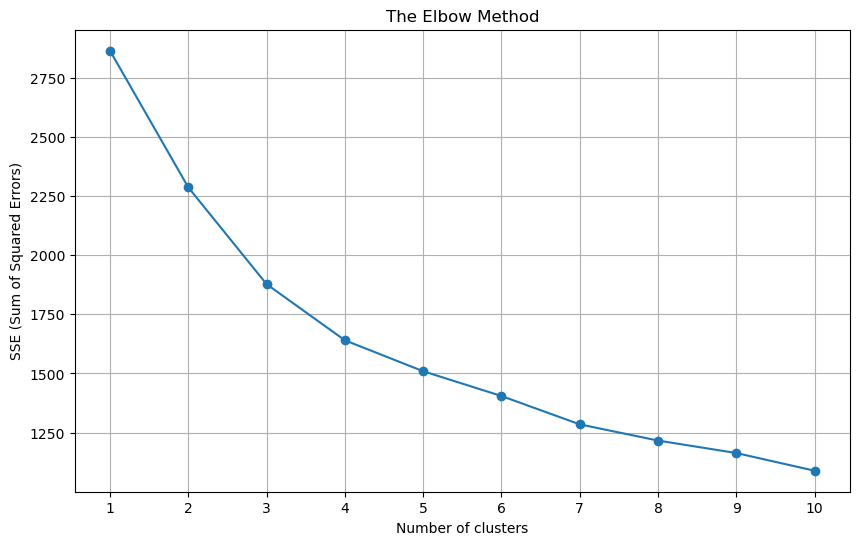

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow method
sse = []
range_clusters = range(1, 11)  # Trying with 1 to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imdb_data_preprocessed)
    sse.append(kmeans.inertia_)

# Plotting the SSE vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sse, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


Applying K-means clustering

In [6]:
# Applying K-means clustering with the chosen number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(imdb_data_preprocessed)

# Assigning the cluster labels to each movie
cluster_labels = kmeans.labels_

# Adding cluster labels to the original dataset for analysis
imdb_data['cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
imdb_data[['title', 'genre', 'runtime', 'mpaa_rating', 'imdb_rating', 'imdb_num_votes', 'cluster']].head()


,title,genre,runtime,mpaa_rating,imdb_rating,imdb_num_votes,cluster
0,Filly Brown,Drama,80.0,R,5.5,899,0
1,The Dish,Drama,101.0,PG-13,7.3,12285,1
2,Waiting for Guffman,Comedy,84.0,R,7.6,22381,1
3,The Age of Innocence,Drama,139.0,PG,7.2,35096,2
4,Malevolence,Horror,90.0,R,5.1,2386,0
